<a href="https://colab.research.google.com/github/rubyvanrooyen/ARIWS-Cookbook/blob/main/casa/Inspect_and_flagging_calibrators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIWS notebook with sample MeerKAT data using CASA

See the [CASA installation](https://casa.nrao.edu/casadocs/casa-5.6.0/introduction/casa6-installation-and-usage) page for information on the CASA with Jupiter notebooks and Colab
Example code for this notebook can be found on [CASA6_demo.ipynb](https://go.nrao.edu/casa6)

Refer to the [MeerKAT Cookbook](https://github.com/ska-sa/MeerKAT-Cookbook) for information related to archive data access and tokens, as well as the MeerKAT `katdal` software package.

## CASA workspace installation

In [1]:
!pip install --index-url https://casa-pip.nrao.edu/repository/pypi-casa-release/simple casaplotms==1.0.24

Looking in indexes: https://casa-pip.nrao.edu/repository/pypi-casa-release/simple


In [2]:
import os

print("installing pre-requisite packages...")
!apt-get install -y libgfortran3

print("building config files...")
!mkdir -p ~/.casa
!echo home, datapath = \'/content/\', [\'/content/\'] > ~/.casa/toolrc.py
!cat ~/.casa/toolrc.py

print('complete')

# check installation
import casatasks
from casatasks import listobs

installing pre-requisite packages...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgfortran3 is already the newest version (6.5.0-2ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
building config files...
home, datapath = '/content/', ['/content/']
complete


In [3]:
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay

print(os.getenv('DISPLAY'))

import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

print(os.getenv('DISPLAY'))

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.7).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
None
:2


## Upload data
Example data set `ngc3621.ms.tar.gz`

In [5]:
from google.colab import files
files.upload()

Saving ngc3621.ms.tar.gz to ngc3621.ms.tar.gz


Unpack MeerKAT example data file

In [2]:
import os
rc = os.system("tar -xvzf ngc3621.ms.tar.gz")

## Visualising and inspecting MeerKAT data

In [4]:
from IPython.display import Image
import casaplotms
from casaplotms import plotms
from casatasks import flagdata
from casatasks import listobs

In [5]:
msfile = "ngc3621.ms"
listobs(vis=msfile)
print(os.popen("cat casa-*.log").read())

2020-10-16 13:49:57	INFO	::casa	
2020-10-16 13:49:59	INFO	::casa	CASA Version 6.1.0.118
2020-10-16 13:49:59	INFO	::casa	Can't import casatelemetry module.
2020-10-16 13:51:46	INFO	listobs::::casa	##########################################
2020-10-16 13:51:46	INFO	listobs::::casa	##### Begin Task: listobs            #####
2020-10-16 13:51:46	INFO	listobs::::casa	listobs( vis='ngc3621.ms', selectdata=True, spw='', field='', antenna='', uvrange='', timerange='', correlation='', scan='', intent='', feed='', array='', observation='', verbose=True, listfile='', listunfl=False, cachesize=50.0, overwrite=False )
2020-10-16 13:51:46	INFO	listobs::ms::summary	================================================================================
2020-10-16 13:51:46	INFO	listobs::ms::summary+	           MeasurementSet Name:  /content/ngc3621.ms      MS Version 2
2020-10-16 13:51:46	INFO	listobs::ms::summary+	================================================================================
2020-10-16 13:5

To view the CASA log file, double click on the file casa-*.log to open for display.    
To refresh the display, double click on the file again.

In [6]:
prefix='ngc3621'
target='NGC3621'
g_cal='1117-248'
b_cal='0408-65'
f_cal='0408-65'

### Apply standard L-band flags

Remove any antennas shadowing each other

In [7]:
flagdata(vis=msfile, mode='shadow');
# if a Leap second warning is raised, simply run the command again to get rid of the warning

Remove bad points that is below minimum pointing angle of observation

In [8]:
flagdata(vis=msfile, mode='elevation', lowerlimit=15., upperlimit=90., action='apply');

Remove extreme outliers

In [9]:
flagdata(vis=msfile, mode='clip', clipminmax = [1e-5, 1000.0]);

Spectral windows are sub-bands. MeerKAT has only one sub-band.
Remove bandpass edges and the Milky Way

In [10]:
flagdata(vis=msfile,
         field='0408-65,1117-248',
         mode='manual',
         spw='*:856~880MHz,*:1658~1800MHz,*:1420.0~1421.3MHz',
         flagbackup=False);

### Check for bad antennas
Flag antennas based on the (mis)behaviour of their autocorrelations.

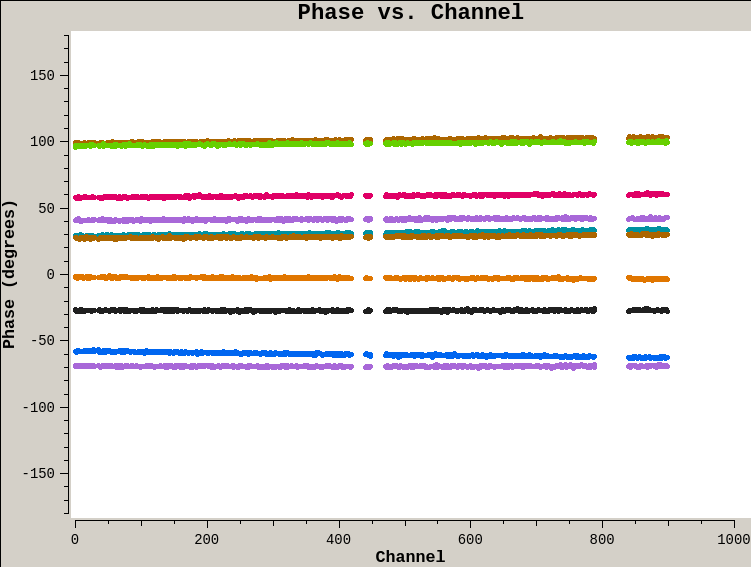

In [11]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       correlation='YY',
       field=f_cal,
       coloraxis='baseline',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

To view the image, double click on the `ngc362_passband.png` file or download the image to your computer.


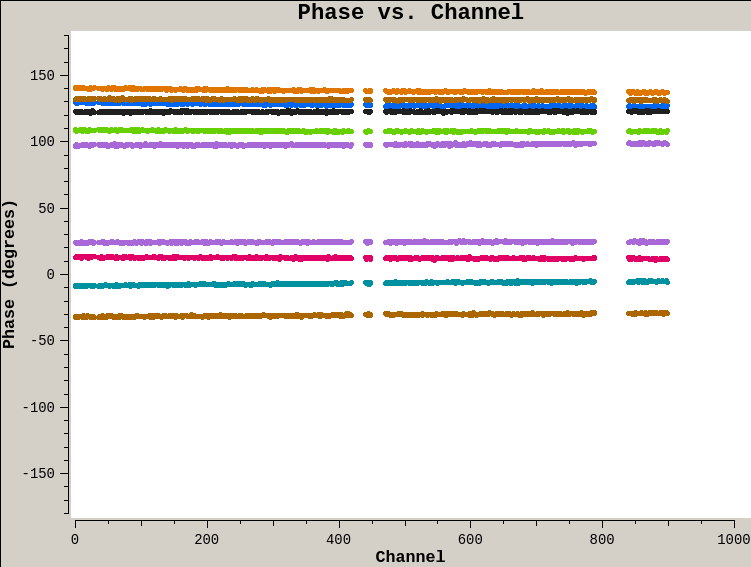

In [12]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       correlation='XX',
       field=f_cal,
       coloraxis='baseline',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

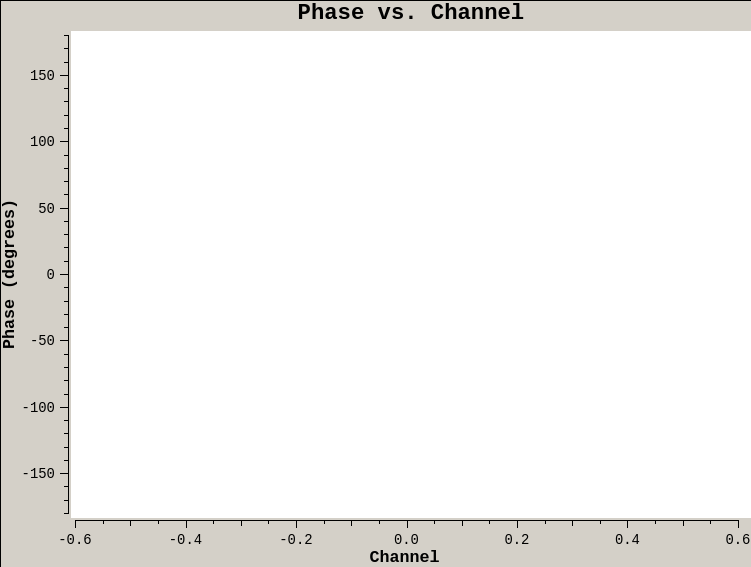

In [13]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       correlation='XX',
       field=f_cal,
       antenna='m022',
       coloraxis='corr',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

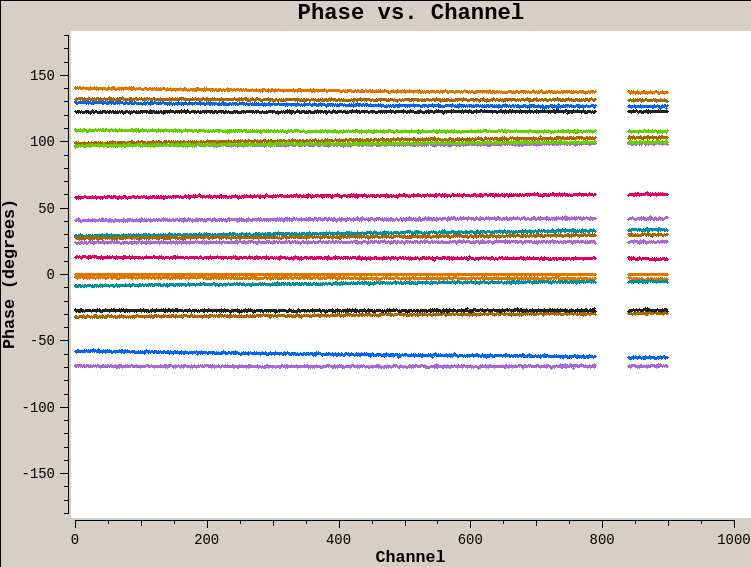

In [21]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       correlation='XX,YY',
       field=f_cal,
       antenna='!m022',
       coloraxis='baseline',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

### Check all the scans of the primary calibrators
Flag based on the autocorrelations.

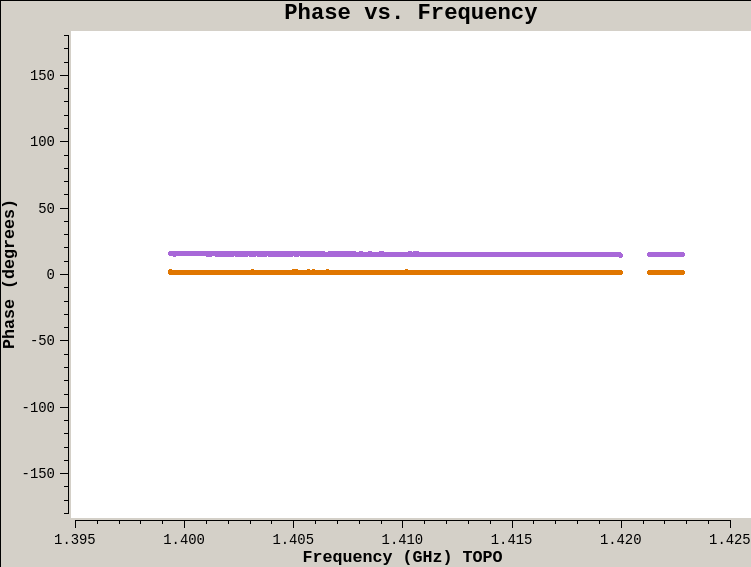

In [22]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       correlation='XX,YY',
       field=f_cal,
       antenna='!m022',
       scan='1',
       coloraxis='corr',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

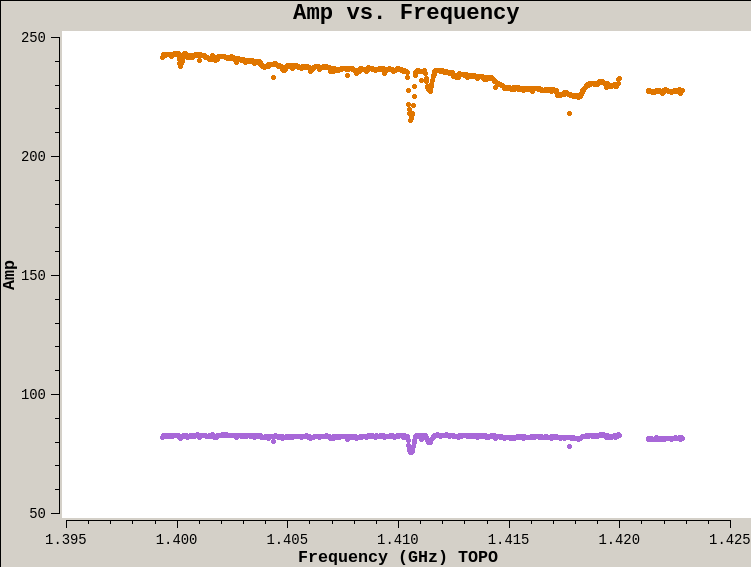

In [24]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       correlation='XX,YY',
       field=f_cal,
       antenna='!m022',
       scan='1',
       coloraxis='corr',
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

### Check all the channels and scans for the secondary calibrator

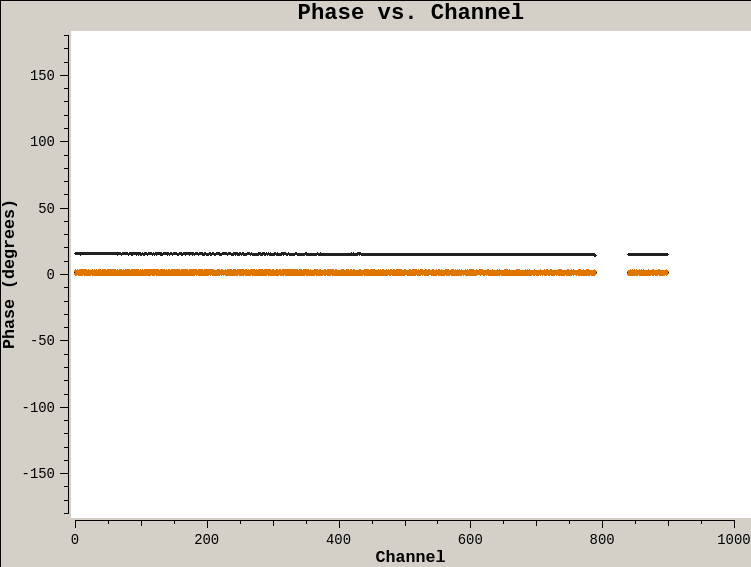

In [25]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       correlation='XX,YY',
       field=f_cal+','+g_cal,
       antenna='!m022',
       scan='1,3,5,7,9,11',
       coloraxis='field',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

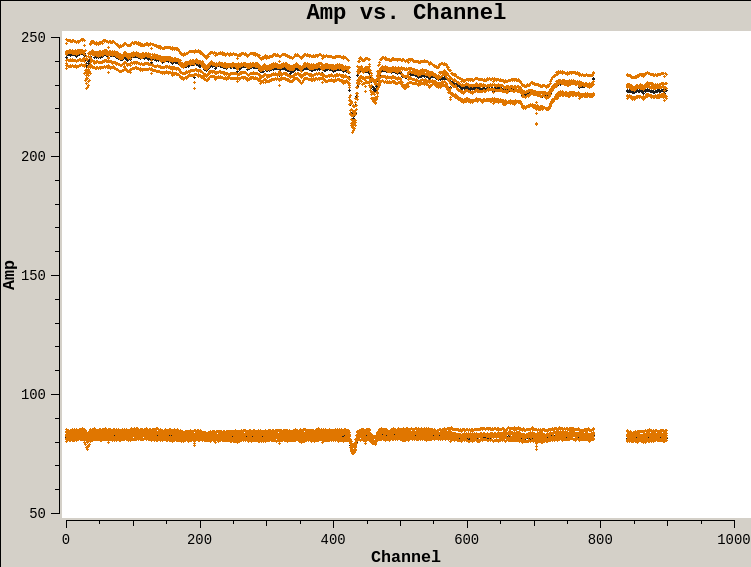

In [26]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='amp',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       correlation='XX,YY',
       field=f_cal+','+g_cal,
       antenna='!m022',
       scan='1,3,5,7,9,11',
       coloraxis='field',
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

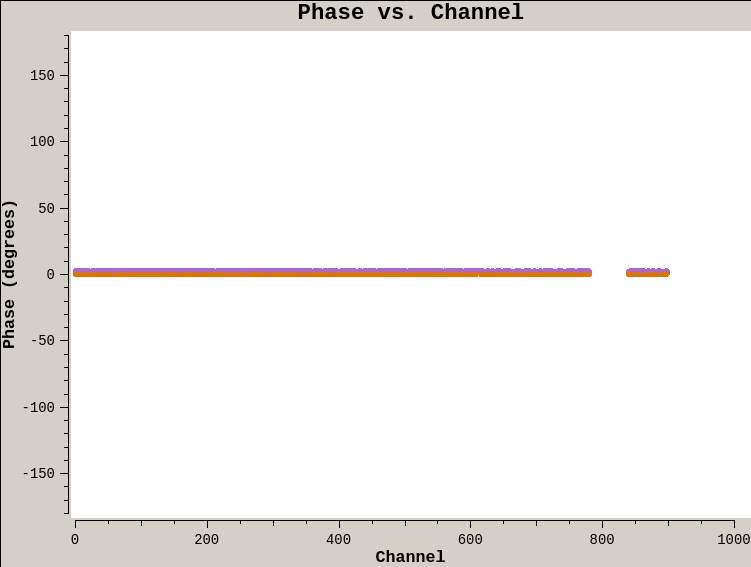

In [27]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       correlation='XX,YY',
       field=g_cal,
       antenna='!m022',
       scan='3,5,7,9,11',
       spw='*:0~780;820~900',
       coloraxis='corr',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

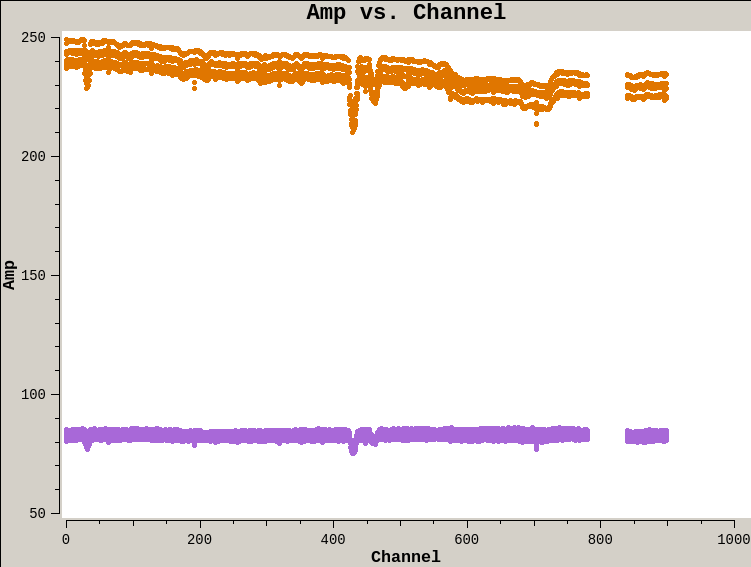

In [28]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='amp',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       correlation='XX,YY',
       field=g_cal,
       antenna='!m022',
       scan='3,5,7,9,11',
       spw='*:0~780;820~900',
       coloraxis='corr',
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

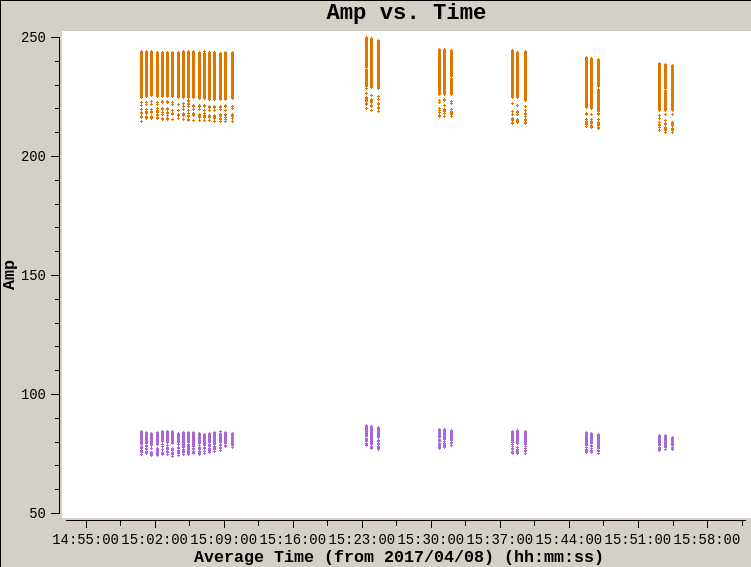

In [29]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='amp',
       averagedata=True,
       avgtime='30',
       avgbaseline=True,
       correlation='XX,YY',
       field=f_cal+','+g_cal,
       antenna='!m022',
       scan='1,3,5,7,9,11',
       spw='*:0~780;820~900',
       coloraxis='corr',
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

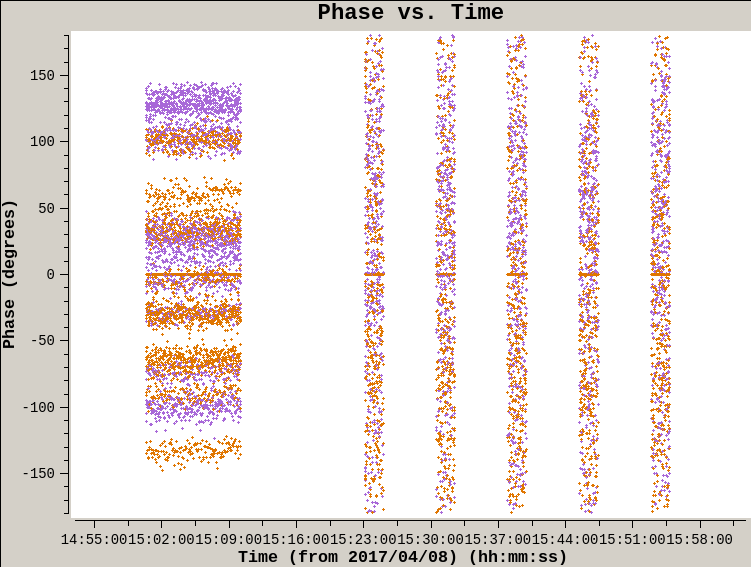

In [30]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='phase',
       correlation='XX,YY',
       field=f_cal+','+g_cal,
       spw='*:2550',
       plotrange=[0,0,-180,180],
       coloraxis='corr',
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

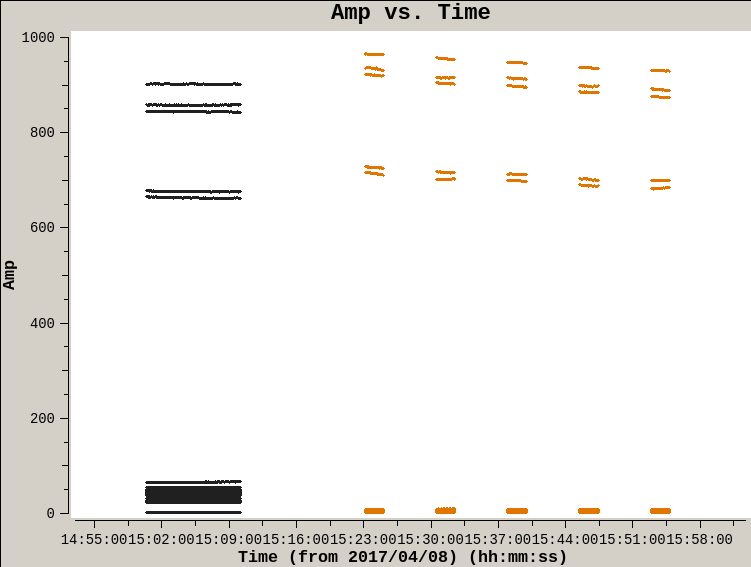

In [31]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='amp',
       field=f_cal+','+g_cal,
       averagedata=True,
       avgchannel='4096',
       coloraxis='field',
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

### Flagging data

In [32]:
flagdata(vis=msfile, mode='manual', antenna='m022');

In [33]:
flagdata(vis=msfile, field='0408-65,1117-248', mode='manual', spw='*:30~35', flagbackup=False);
flagdata(vis=msfile, field='0408-65,1117-248', mode='manual', spw='*:420~440', flagbackup=False);
flagdata(vis=msfile, field='0408-65,1117-248', mode='manual', spw='*:450~470', flagbackup=False);
flagdata(vis=msfile, field='0408-65,1117-248', mode='manual', spw='*:790~807', flagbackup=False);

In [34]:
flagdata(vis=msfile, uvrange='<50lambda', flagbackup=False);

### Checking after flagging

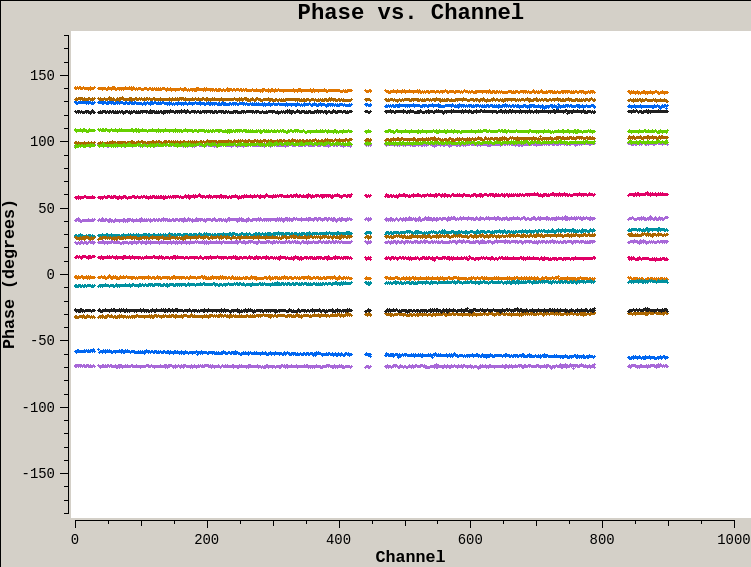

In [36]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='3300',
       correlation='XX,YY',
       field=f_cal,
       coloraxis='baseline',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

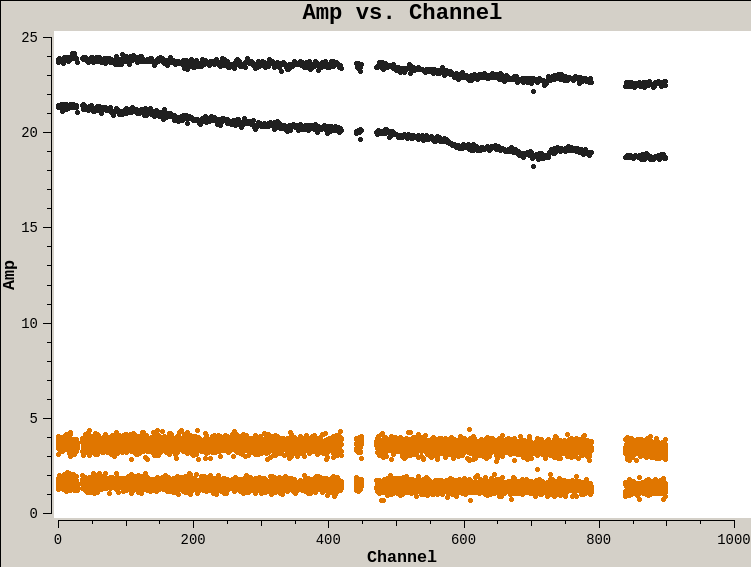

In [37]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='amp',
       averagedata=True,
       avgtime='3300',
       avgbaseline=True,
       correlation='XX,YY',
       field=f_cal+','+g_cal,
       coloraxis='field',
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

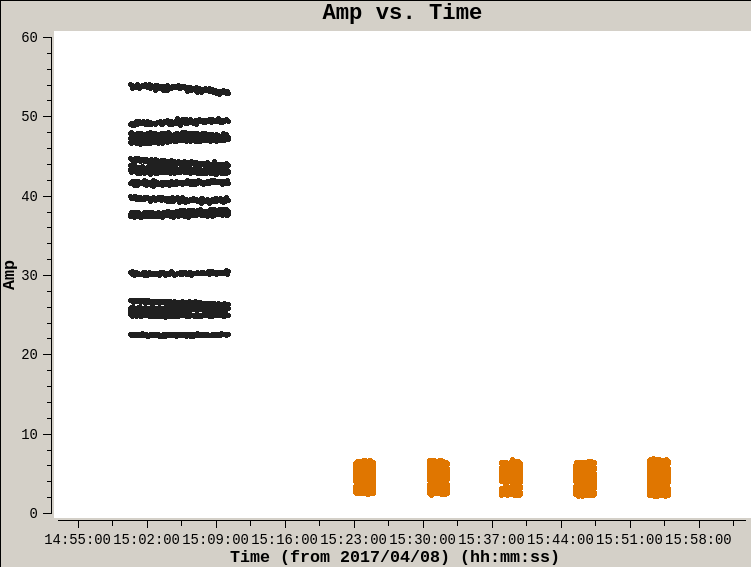

In [38]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='amp',
       averagedata=True,
       avgchannel='4096',
       correlation='XX,YY',
       field=f_cal+','+g_cal,
       coloraxis='field',
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)

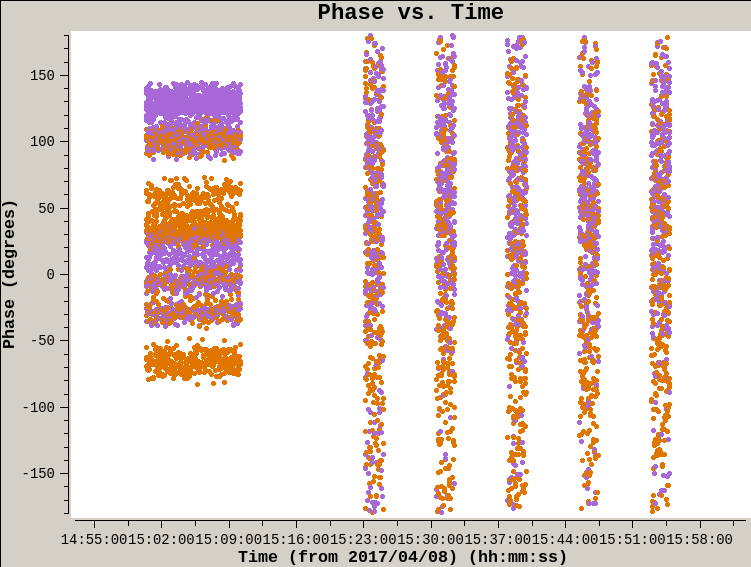

In [39]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='phase',
       correlation='XX,YY',
       field=f_cal+','+g_cal,
       spw='*:2550',
       coloraxis='corr',
       plotrange=[0,0,-180,180],
       showgui=False,
       plotfile='ngc362_passband.png',
       overwrite=True,
       )
Image('ngc362_passband.png', height=500)